In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("yob1880.txt", names=["Name", "Sex", "Births"])

In [3]:
data.head()

,Name,Sex,Births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
data.groupby("Sex")["Births"].sum()

Sex
F     90994
M    110490
Name: Births, dtype: int64

In [5]:
pieces = []

for year in range(1880, 2023):
    path = f"yob{year}.txt"
    frame = pd.read_csv(path, names=["Name", "Sex", "Births"])
    frame["Year"] = year
    pieces.append(frame)

In [6]:
names = pd.concat(pieces, ignore_index=True)

In [7]:
names

,Name,Sex,Births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [63]:
names[(names["Year"] == 1880) & (names["Sex"] == "F")]["Births"].sum()

90994

In [64]:
names["Births"][0] / names[(names["Year"] == 1880) & (names["Sex"] == "F")]["Births"].sum()

0.07764248192188496

In [8]:
names["Year"][-1:]

2085157    2022
Name: Year, dtype: int64

In [9]:
total_births = names.pivot_table("Births", index="Year", columns="Sex", aggfunc=sum)

In [10]:
total_births

Sex,F,M
Year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588


In [11]:
total_births_df = pd.DataFrame(total_births)

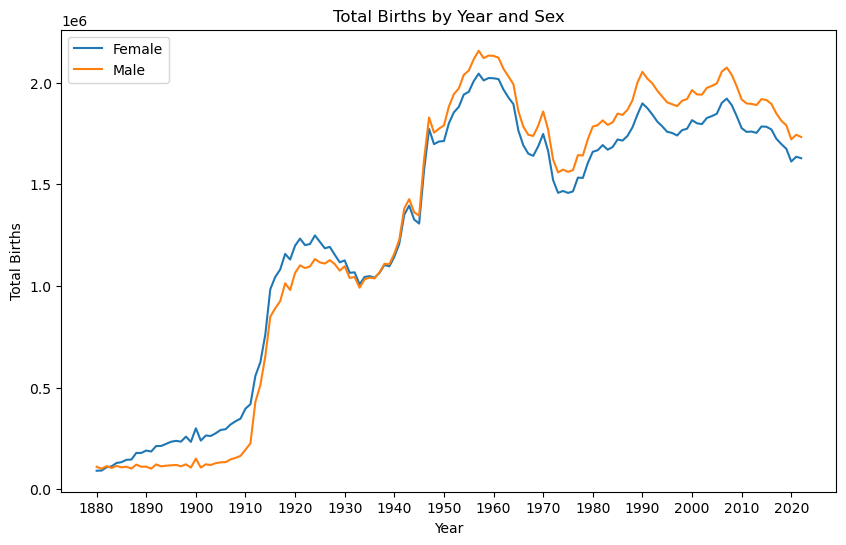

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(total_births_df.index, total_births_df['F'], label='Female')
plt.plot(total_births_df.index, total_births_df['M'], label='Male')
plt.xticks(range(1880, 2022, 10))
plt.title('Total Births by Year and Sex')
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.legend()
# plt.grid(True)
plt.show()

<Axes: xlabel='Year'>

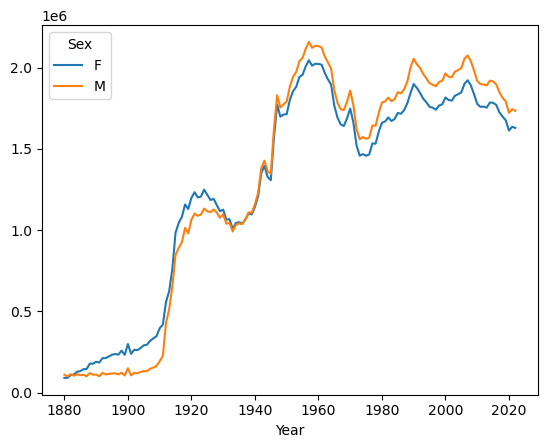

In [13]:
total_births.plot()

In [14]:
def add_prop(group):
    group["prop"] = group["Births"] / group["Births"].sum()
    return group

In [15]:
names

,Name,Sex,Births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [16]:
names = pd.concat(pieces, ignore_index=True)

In [17]:
names

,Name,Sex,Births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085153,Zuberi,M,5,2022
2085154,Zydn,M,5,2022
2085155,Zylon,M,5,2022
2085156,Zymeer,M,5,2022


In [18]:
names.groupby("Sex")["Births"].sum()

Sex
F    180680711
M    184615480
Name: Births, dtype: int64

In [19]:
names.groupby(["Sex", "Year"])["Births"].sum()

Sex  Year
F    1880      90994
     1881      91953
     1882     107847
     1883     112320
     1884     129019
              ...   
M    2018    1813377
     2019    1790682
     2020    1721588
     2021    1743913
     2022    1733166
Name: Births, Length: 286, dtype: int64

In [20]:
names.groupby(["Year", "Sex"])["Births"].sum()

Year  Sex
1880  F        90994
      M       110490
1881  F        91953
      M       100737
1882  F       107847
              ...   
2020  M      1721588
2021  F      1635800
      M      1743913
2022  F      1628730
      M      1733166
Name: Births, Length: 286, dtype: int64

In [21]:
names.groupby(["Year", "Sex"]).apply(add_prop)

Name Sex  Births  Year      prop
Year Sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2022 M   2085153     Zuberi   M       5  2022  0.000003
         2085154       Zydn   M       5  2022  0.000003
         2085155      Zylon   M       5  2022  0.000003
         2085156     Zymeer   M       5  2022  0.000003
         2085157    Zymeire   M       5  2022  0.000003

[2085158 rows x 5 columns]

In [22]:
names = names.groupby(["Year", "Sex"], group_keys=False).apply(add_prop)

In [23]:
names

,Name,Sex,Births,Year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2085153,Zuberi,M,5,2022,0.000003
2085154,Zydn,M,5,2022,0.000003
2085155,Zylon,M,5,2022,0.000003
2085156,Zymeer,M,5,2022,0.000003


In [65]:
names["Births"][0] / names[(names["Year"] == 1880) & (names["Sex"] == "F")]["Births"].sum()

0.07764248192188496

In [24]:
names.groupby(["Year", "Sex"])["prop"].sum()

Year  Sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 286, dtype: float64

In [25]:
# top 1000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values("Births", ascending=False)[:1000]

In [26]:
grouped = names.groupby(["Year", "Sex"])

In [27]:
top1000 = grouped.apply(get_top1000)

In [43]:
top1000

,Name,Sex,Births,Year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
285871,Atharv,M,223,2022,0.000129
285872,Imran,M,223,2022,0.000129
285873,Asaiah,M,223,2022,0.000129
285874,Kalel,M,222,2022,0.000128


In [29]:
top1000 = top1000.reset_index(drop=True)

In [30]:
top1000

,Name,Sex,Births,Year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
285871,Atharv,M,223,2022,0.000129
285872,Imran,M,223,2022,0.000129
285873,Asaiah,M,223,2022,0.000129
285874,Kalel,M,222,2022,0.000128


In [31]:
boys = top1000[top1000["Sex"] == "M"]
girls = top1000[top1000["Sex"] == "F"]

In [32]:
total_births = top1000.pivot_table("Births", index="Year", columns="Name", aggfunc=sum)

In [33]:
total_births

Name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
Year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,NaN,NaN,3836.0,NaN,488.0,NaN,5986.0,NaN,NaN,NaN,...,277.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3661.0,NaN,419.0,NaN,5534.0,NaN,NaN,209.0,...,266.0,NaN,NaN,353.0,NaN,NaN,1181.0,NaN,540.0,213.0
2020,NaN,NaN,3572.0,NaN,418.0,NaN,5087.0,NaN,256.0,NaN,...,274.0,NaN,NaN,308.0,282.0,NaN,1264.0,225.0,668.0,NaN


In [34]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 1880 to 2022
Columns: 7322 entries, Aaden to Zyon
dtypes: float64(7322)
memory usage: 8.0 MB


In [41]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

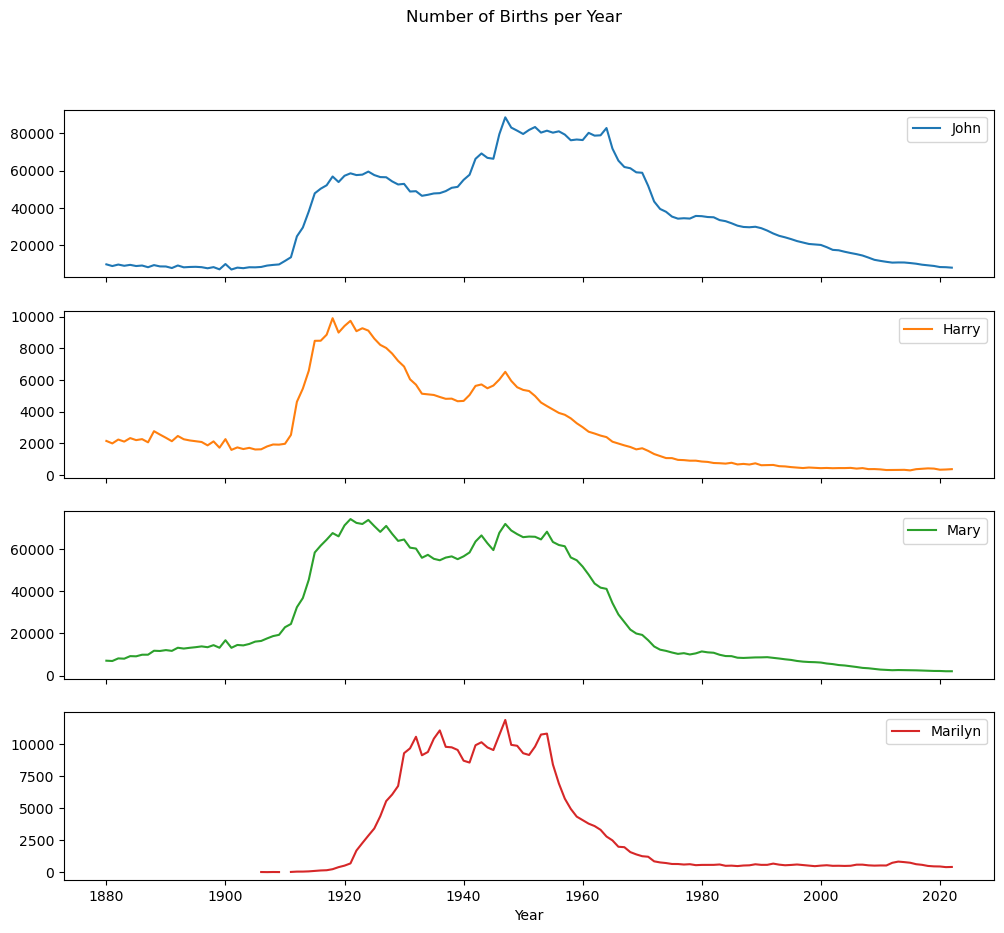

In [42]:
subset.plot(subplots=True, figsize=(12, 10), title="Number of Births per Year")

In [67]:
table = top1000.pivot_table("prop", index="Year", columns="Sex", aggfunc=sum)

In [68]:
table

Sex,F,M
Year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2018,0.741403,0.829435
2019,0.739471,0.825434
2020,0.737928,0.822428


<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='Year'>

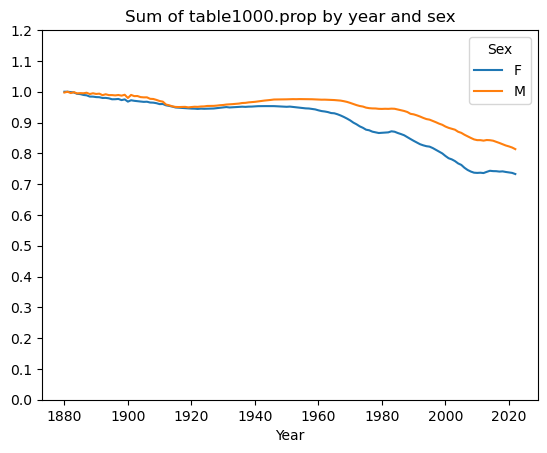

In [70]:
table.plot(title="Sum of table1000.prop by year and sex", yticks=np.linspace(0, 1.2, 13))

In [71]:
df = boys[boys["Year"] == 2010]

In [72]:
df

,Name,Sex,Births,Year,prop
260876,Jacob,M,22144,2010,0.011547
260877,Ethan,M,18011,2010,0.009392
260878,Michael,M,17374,2010,0.009059
260879,Jayden,M,17192,2010,0.008964
260880,William,M,17064,2010,0.008898
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [73]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()

In [74]:
prop_cumsum[:10]

260876    0.011547
260877    0.020938
260878    0.029998
260879    0.038962
260880    0.047860
260881    0.056599
260882    0.065186
260883    0.073454
260884    0.081559
260885    0.089643
Name: prop, dtype: float64

In [75]:
prop_cumsum.searchsorted(0.5)

116

In [76]:
df = boys[boys.Year == 1900]

In [77]:
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()

In [78]:
in1900.searchsorted(0.5) + 1

25

In [79]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

In [80]:
diversity = top1000.groupby(["Year", "Sex"]).apply(get_quantile_count)

In [81]:
diversity = diversity.unstack()

In [82]:
diversity

Sex,F,M
Year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2018,259,149
2019,265,155
2020,272,163


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='Year'>

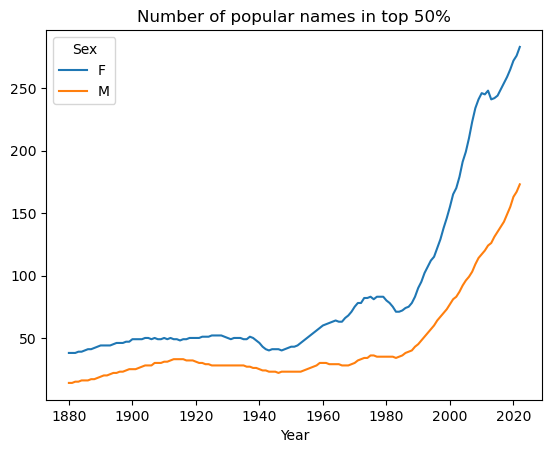

In [83]:
diversity.plot(title="Number of popular names in top 50%")

In [84]:
def get_last_letter(x):
    return x[-1]

In [85]:
last_letters = names["Name"].map(get_last_letter)

In [86]:
last_letters.name = "last_letter"

In [87]:
table = names.pivot_table("Births", index=last_letters, columns=["Sex", "Year"], aggfunc=sum)

In [88]:
table

Sex                F                                                        \
Year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41914.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

Sex                                     ...         M                      \
Year            1887     1888     1889  ...      2013      2014      2015   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27478.0   28329.0   29068.0   
b                NaN      NaN      NaN  ...   33285.0   31426.0   29643.0   
c                NaN      NaN      NaN  ...   24099.0   23854.0   23164.0   
d             1027.0   1298.0   1374.0  ...   42732.0   44095.0   43833.0   
e            54353.0  66748.0  66662.0  ...  132378.0  132244.0  128753.0   
f                NaN      NaN      NaN  ...    2594.0    2883.0    2829.0   
g               25.0     44.0     28.0  ...    4430.0    4725.0    4976.0   
h             7141.0   8630.0   8825.0  ...  100061.0  102199.0  102762.0   
i              105.0    141.0    134.0  ...   45477.0   46655.0   49097.0   
j                NaN      NaN      NaN  ...    1405.0    1362.0    1454.0   
k               19.0     21.0     22.0  ...   34890.0   35810.0   35427.0   
l             6174.0   7900.0   8395.0  ...  126920.0  127683.0  127940.0   
m               90.0    123.0    137.0  ...   57118.0   58785.0   59181.0   
n             5512.0   6832.0   7103.0  ...  669878.0  673873.0  662908.0   
o               97.0    134.0    142.0  ...   79544.0   82429.0   86656.0   
p                NaN      NaN      NaN  ...    2600.0    2526.0    2381.0   
q                NaN      NaN      NaN  ...     336.0     312.0     351.0   
r              910.0   1207.0   1214.0  ...  170528.0  178302.0  181255.0   
s             2803.0   3581.0   3569.0  ...  123910.0  128315.0  130231.0   
t             3140.0   3816.0   3784.0  ...

In [91]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="Year")

In [93]:
subtable.head()

Sex                 F                            M                    
Year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691323.0  677323.0    977.0    5217.0   28896.0
b                 NaN     694.0     455.0    411.0    3911.0   39304.0
c                 5.0      49.0     958.0    482.0   15458.0   23364.0
d              6751.0    3731.0    2645.0  22112.0  262131.0   44864.0
e            133599.0  435008.0  317005.0  28665.0  178762.0  130348.0

In [94]:
subtable.sum()

Sex  Year
F    1910     396503.0
     1960    2022061.0
     2010    1776636.0
M    1910     194209.0
     1960    2132230.0
     2010    1917792.0
dtype: float64

In [95]:
letter_prop = subtable / subtable.sum()

In [97]:
letter_prop.head()

Sex                 F                             M                    
Year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341890  0.381239  0.005031  0.002447  0.015067
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113857  0.122937  0.023394
e            0.336943  0.215131  0.178430  0.147599  0.083838  0.067968

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

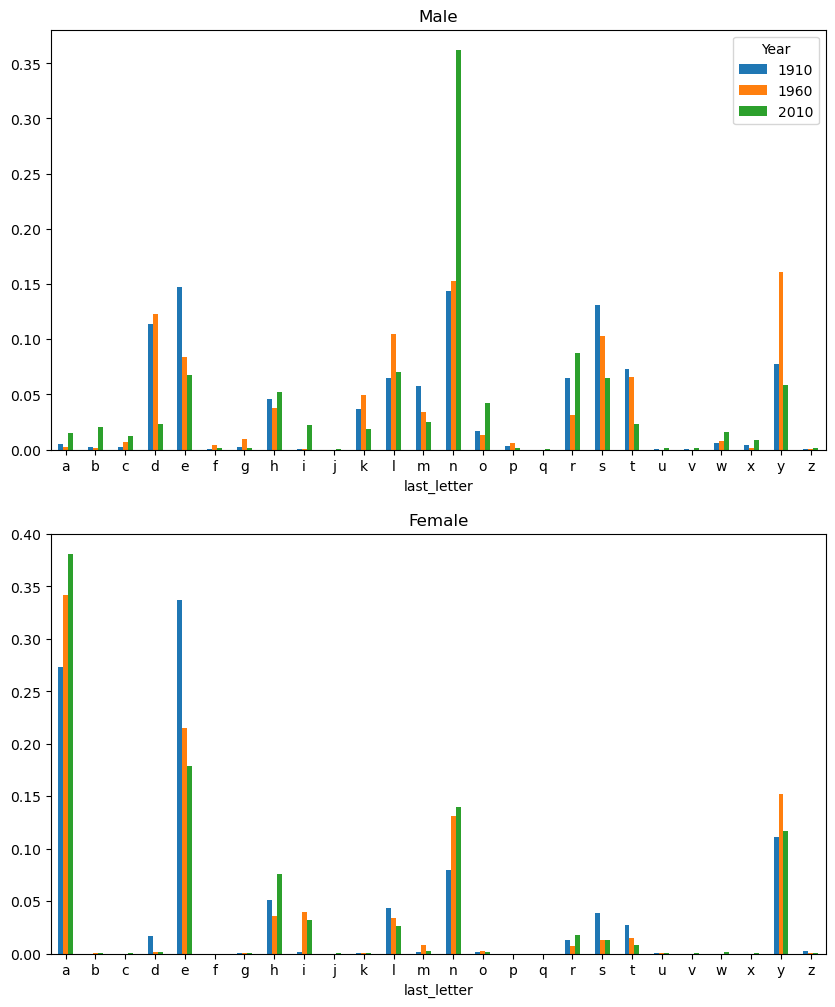

In [100]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 12))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)

In [101]:
letter_prop = table / table.sum()

In [103]:
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T

In [104]:
dny_ts.head()

last_letter,d,n,y
Year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='Year'>

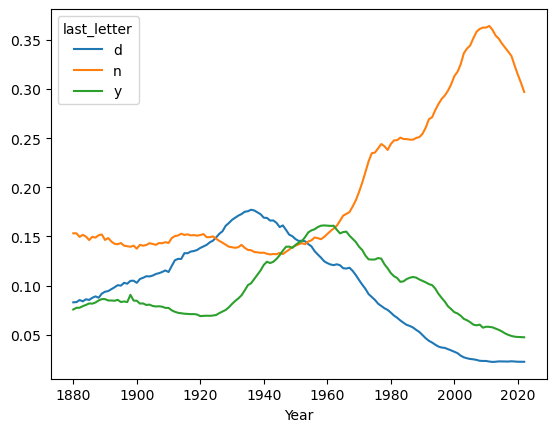

In [108]:
dny_ts.plot()

In [109]:
dny_ts = letter_prop.loc[["d", "n", "y"], "F"].T

<Axes: xlabel='Year'>

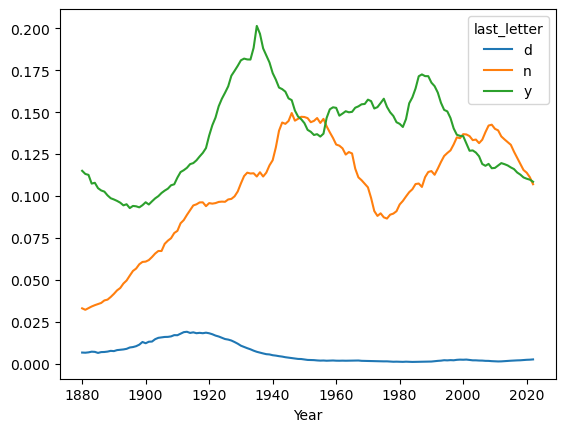

In [110]:
dny_ts.plot()

In [111]:
all_names = pd.Series(top1000["Name"].unique())

In [112]:
lesley_like = all_names[all_names.str.contains("Lesl")]

In [113]:
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4730     Lesli
6105     Lesly
dtype: object

In [114]:
filtered = top1000[top1000["Name"].isin(lesley_like)]

In [119]:
filtered.head()

,Name,Sex,Births,Year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2461,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4511,Leslie,F,9,1882,0.000083


In [115]:
filtered.groupby("Name")["Births"].sum()

Name
Leslee       993
Lesley     35039
Lesli        929
Leslie    380170
Lesly      11434
Name: Births, dtype: int64

In [116]:
table = filtered.pivot_table("Births", index="Year", columns="Sex", aggfunc=sum)

In [120]:
table.head()

Sex,F,M
Year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [121]:
table = table.div(table.sum(axis="columns"), axis="index")  # 8.0 / (8.0 + 79.0)

In [137]:
table.head()

Sex,F,M
Year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


In [139]:
8.0 / (8.0 + 79.0)

0.09195402298850575

<Axes: xlabel='Year'>

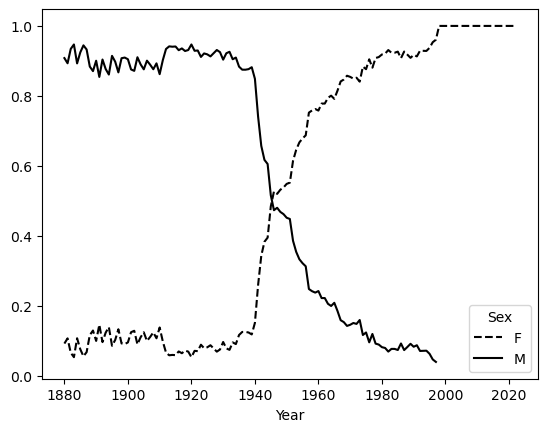

In [140]:
table.plot(style={"M": "k-", "F": "k--"})